## Player Heatmap

In [10]:
import json
import pandas as pd
from mplsoccer import Pitch, Sbopen
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D


c:\Users\grego\anaconda3\envs\SoccerAnalytics\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


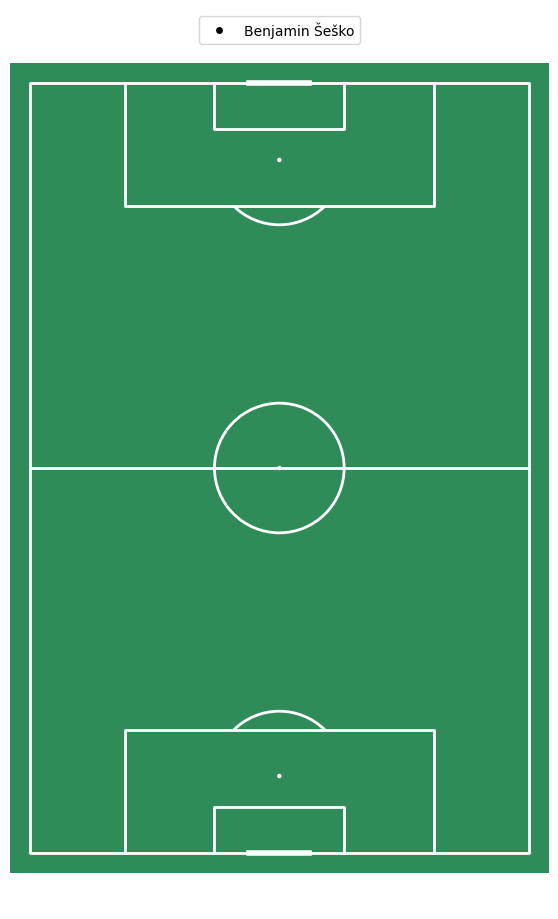

c:\Users\grego\anaconda3\envs\SoccerAnalytics\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


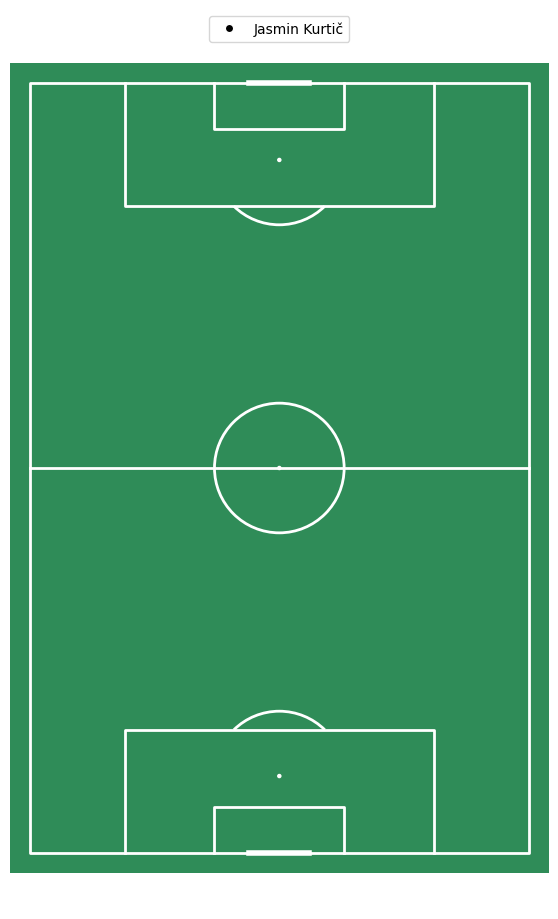

c:\Users\grego\anaconda3\envs\SoccerAnalytics\Lib\site-packages\mplsoccer\_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)


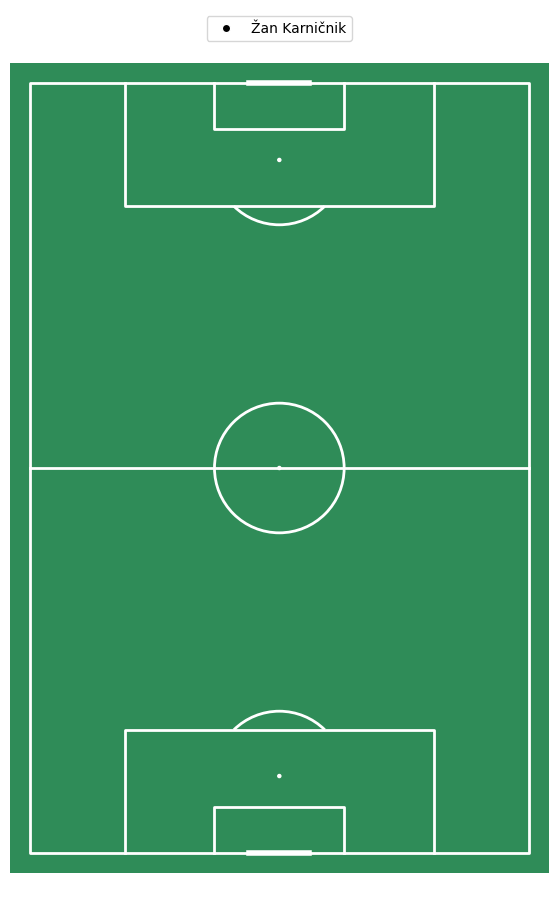

In [15]:

# Import the dataset
file_path = './input/wyscout/5414260.json'
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file) 
    
df = pd.json_normalize(data, record_path=['events'])


# Create an array with players you want to see
player = ['Benjamin Šeško', 'Jasmin Kurtič', 'Žan Karničnik']
for pl in player:
    df_player = df[df['player.name'] == pl]
        
    # Pitch     
    pitch = VerticalPitch(pitch_color='#2f8c58', 
                          line_color='white', 
                          pitch_type='wyscout')
    
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.04, title_space=0, endnote_space=0)

    # Heatmap as Kernel Density Estimation
    pitch.kdeplot(
    x=df_player['location.x'],
    y=df_player['location.y'],
    shade = False,
    shade_lowest=False,
    alpha=.5,
    n_levels=10,
    cmap = 'coolwarm',
    ax=ax['pitch']
    )

    legend_elements = [Line2D([0], [0], color='w', markerfacecolor='k', marker='o', label=pl)]

    plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1), bbox_transform=plt.gcf().transFigure,  
               handlelength=2, labelspacing=1.2, fontsize=10)
    plt.savefig(f'{pl}_heatmap.png')
    plt.show()
